In [1]:
import os
import cv2 as cv
from PIL import Image
import pytesseract as pt
from matplotlib import pyplot as plt
from pdf2image import convert_from_path
import re

In [2]:
pt.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'extracting_information_from_krs.ipynb',
 'my_krs.jpg',
 'my_krs2.jpg',
 'my_krs3.jpg']

In [4]:
avb_langs = pt.get_languages(config='')

for lang in avb_langs:
    print(lang)

eng
ind
osd


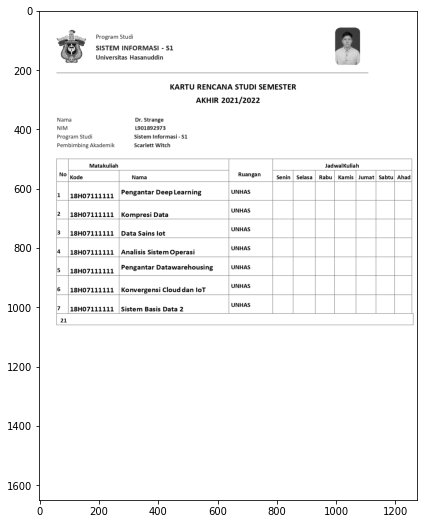

In [5]:
data_path = 'my_krs.jpg'
img= cv.imread(data_path, 0)

plt.figure(figsize=(12,9))
plt.imshow(img, cmap='gray')
plt.show()

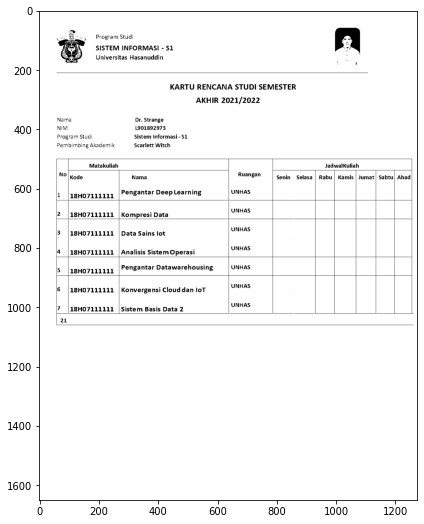

In [6]:
ret, img = cv.threshold(img,127,255,cv.THRESH_BINARY)

plt.figure(figsize=(12,9))
plt.imshow(img, cmap='gray')
plt.show()

In [7]:
text = pt.image_to_string(img, lang='ind')

print(text)

Program Studi

SISTEM INFORMASI — S1
Universitas Hasanuddin

Nama

NIM

Program Studi
Pembimbing Akademik

KARTU RENCANA STUDI SEMESTER
AKHIR 2021/2022

Dr. Strange
1901892973

Sistem Informasi — S1
Scarlett Witch

Matakuliah JadwalKuliah
NO |kode Nama Ruangan Senin — Selasa | Rabu | Kamis | Jumat | Sabtu/ Ahad
: |1skoz111111 |Pengantar DeepLearning UNHAS
2 |18HO7111111 |Kompresi Data UNHAS
B— |18HO7111111 |Data Sains lot UNHAS
4 |18HO7111111 |Analisis SistemOperasi UNHAS
s |tskozin11, |Pengantar Datawarehousing UNHAS
6 |18HO7111111 | Konvergensi Clouddan loT UNHAS
7 |18HO7111111 |Sistem Basis Data 2 UNHAS

21




In [8]:
text_list= text.split('\n')
text_list

['Program Studi',
 '',
 'SISTEM INFORMASI — S1',
 'Universitas Hasanuddin',
 '',
 'Nama',
 '',
 'NIM',
 '',
 'Program Studi',
 'Pembimbing Akademik',
 '',
 'KARTU RENCANA STUDI SEMESTER',
 'AKHIR 2021/2022',
 '',
 'Dr. Strange',
 '1901892973',
 '',
 'Sistem Informasi — S1',
 'Scarlett Witch',
 '',
 'Matakuliah JadwalKuliah',
 'NO |kode Nama Ruangan Senin — Selasa | Rabu | Kamis | Jumat | Sabtu/ Ahad',
 ': |1skoz111111 |Pengantar DeepLearning UNHAS',
 '2 |18HO7111111 |Kompresi Data UNHAS',
 'B— |18HO7111111 |Data Sains lot UNHAS',
 '4 |18HO7111111 |Analisis SistemOperasi UNHAS',
 's |tskozin11, |Pengantar Datawarehousing UNHAS',
 '6 |18HO7111111 | Konvergensi Clouddan loT UNHAS',
 '7 |18HO7111111 |Sistem Basis Data 2 UNHAS',
 '',
 '21',
 '',
 '']

In [9]:
name= text_list[15]
student_id= text_list[16]
major= text_list[2]

In [10]:
subject_list= []

for i in range(23,29,1):
    subject= re.search(r'(?<=\s\|)[A-Za-z ]*(?=UNHAS)', text_list[i]).group(0).strip()
    subject= re.sub(r"(?<=\w)([A-Z][a-z])", r" \1", subject)
    print(subject)
    
    subject_list.append(subject)

Pengantar Deep Learning
Kompresi Data
Data Sains lot
Analisis Sistem Operasi
Pengantar Datawarehousing
Konvergensi Clouddan loT


In [11]:
print(f"Name: {name}\nStudent ID: {student_id}\nMajor: {major}\n\nSubjects: {', '.join(subject_list)}")

Name: Dr. Strange
Student ID: 1901892973
Major: SISTEM INFORMASI — S1

Subjects: Pengantar Deep Learning, Kompresi Data, Data Sains lot, Analisis Sistem Operasi, Pengantar Datawarehousing, Konvergensi Clouddan loT
